Transpose[{Harmonico 1, Harmonico 2, Harmonico 3, Harmonico 4}                   ]
          {Energy = 2.56595, Energy = 2.56595, Energy = 2.56614, Energy = 2.5662}
          {-Graphics-, -Graphics-, -Graphics-, -Graphics-}
{-Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-}
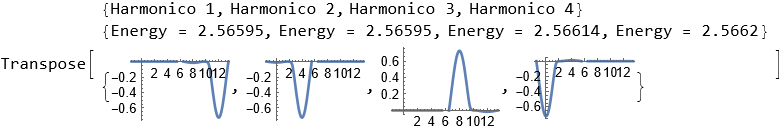
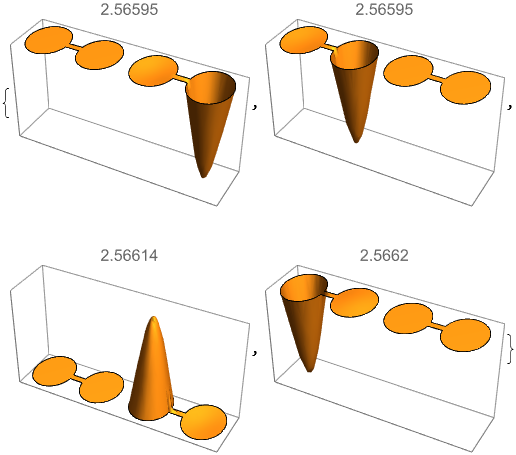

In [134]:
(* ::Package:: *)

(* ::Section::Initialization:: *)
(*Acoustic 2 Sites*)

(* Parameters *)
raio = 1.5;
espessura1 = 0.4;
espessura2 = 0;
separacao = 4;
sites = 4;

(* Create Boundary Graphics *)
boundary = Show[
  Table[Graphics[Disk[{i, 0}, raio]], {i, 0, (sites - 1)*separacao, separacao}],
  Table[
   If[EvenQ[i/separacao],
    Graphics[{Black, Rectangle[{i, 0} + {0.9 raio, -espessura1/2}, {i, 0} + {separacao - 0.9 raio, espessura1/2}]}],
    Graphics[{Black, Rectangle[{i, 0} + {0, -espessura2/2}, {i, 0} + {separacao, espessura2/2}]}]
    ],
   {i, 0, (sites - 2)*separacao, separacao}],
  ImageSize -> 400
];

(* Discretize Boundary *)
bdr = BoundaryDiscretizeGraphics[boundary, MaxCellMeasure -> {"Area" -> 0.01}, AccuracyGoal -> 20, PrecisionGoal -> 20, MeshCellStyle -> {{1, All} -> Red, {0, All} -> Black}];

(* Solve Eigenvalue Problem *)
{vals, funs} = NDEigensystem[{-Laplacian[u[x, y], {x, y}], DirichletCondition[u[x, y] == 0, True]}, u[x, y], {x, y} \[Element] bdr, sites, Method -> {"PDEDiscretization" -> {"FiniteElement", "MeshOptions" -> {"MaxCellMeasure" -> 0.01}}}];

(* Display Results *)
Column[{
  Table["Harmonico " <> ToString[i], {i, 1, sites}],
  Table["Energy = " <> ToString[vals[[i]]], {i, 1, sites}],
  Table[Plot[funs[[i]] /. {x -> xvalue, y -> 0}, {xvalue, -raio, (sites - 1)*separacao + raio}, PlotRange -> All], {i, 1, sites}]
}] // Transpose
Table[Plot3D[funs[[i]], {x, y} \[Element] bdr, PlotRange -> All, PlotLabel -> vals[[i]], PlotTheme -> "Minimal", BoxRatios -> {sites, 1, 2}], {i, Length[vals]}]


-Graphics-
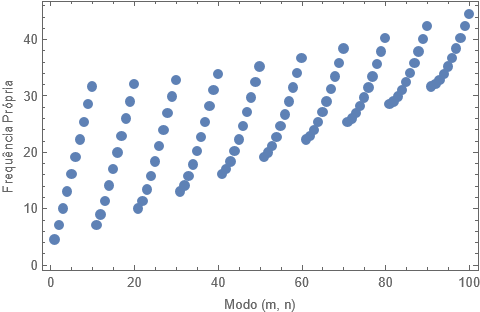

In [27]:
(* Parâmetros *)
L = 1; (* Lado do quadrado *)
mMax = 10; (* Número máximo de modos *)

(* Frequências próprias *)
fSquare[m_, n_] := Sqrt[(m Pi/L)^2 + (n Pi/L)^2];
frequenciesSquare = Flatten[Table[fSquare[m, n], {m, 1, mMax}, {n, 1, mMax}]];

(* Gráfico *)
ListPlot[frequenciesSquare, PlotMarkers -> {Automatic, 10}, 
 PlotRange -> All, Frame -> True, FrameLabel -> {"Modo (m, n)", "Frequência Própria"}]


-Graphics-
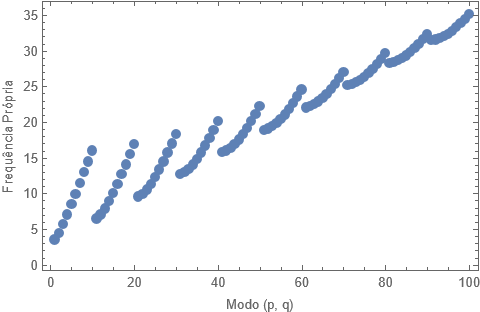

In [39]:
(* Parâmetros *)
a = 1; (* Lado menor do retângulo *)
b = 2; (* Lado maior do retângulo *)
pMax = 10; (* Número máximo de modos *)

(* Frequências próprias *)
fRectangle[p_, q_] := Sqrt[(p Pi/a)^2 + (q Pi/b)^2];
frequenciesRectangle = Flatten[Table[fRectangle[p, q], {p, 1, pMax}, {q, 1, pMax}]];

(* Gráfico *)
ListPlot[frequenciesRectangle, PlotMarkers -> {Automatic, 10}, 
 PlotRange -> All, Frame -> True, FrameLabel -> {"Modo (p, q)", "Frequência Própria"}]
